In [69]:
import pandas as pd
import numpy as np
from scipy.stats import chi2
import matplotlib.pyplot as plt
import scipy.optimize as spo
from tqdm import tqdm

#Parte 1

#1.A

In [99]:
from google.colab import files
uploaded = files.upload()

Saving DataRotacion.csv to DataRotacion (1).csv


In [100]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['DataRotacion.csv']))

df2

,h,angle,y,sigmay
0,10.0,10.0,0.0017,0.0015
1,20.0,10.0,0.0016,0.0015
2,30.0,10.0,0.0027,0.0015
3,40.0,10.0,0.0055,0.0015
4,50.0,10.0,0.0083,0.0015
5,60.0,10.0,0.0085,0.0015
6,70.0,10.0,0.0096,0.0015
7,80.0,10.0,0.0144,0.0015
8,90.0,10.0,0.0200,0.0015
9,100.0,10.0,0.0208,0.0015


In [102]:
datos = np.array(df2,np.float64)

#1.b

In [101]:
def Filtro_lambda(datos,Ld):
  x,y = np.shape(datos)
  sol2 = []
  for i in range(x):
    if datos[i][1] == Ld:
      sol2.append(datos[i])
  r = np.asarray(sol2)
  return r

b = Filtro_lambda(datos,3.00e+01)
b

array([[1.00e+01, 3.00e+01, 1.30e-03, 1.50e-03],
       [2.00e+01, 3.00e+01, 1.70e-03, 1.50e-03],
       [3.00e+01, 3.00e+01, 3.80e-03, 1.50e-03],
       [4.00e+01, 3.00e+01, 5.90e-03, 1.50e-03],
       [5.00e+01, 3.00e+01, 6.70e-03, 1.50e-03],
       [6.00e+01, 3.00e+01, 9.40e-03, 1.50e-03],
       [7.00e+01, 3.00e+01, 1.22e-02, 1.50e-03],
       [8.00e+01, 3.00e+01, 1.32e-02, 1.50e-03],
       [9.00e+01, 3.00e+01, 1.51e-02, 1.50e-03],
       [1.00e+02, 3.00e+01, 1.86e-02, 1.50e-03]])

#1.C

In [103]:
def desviacion(h,p,latitud,g):
  return ((2*np.sqrt(2))/3)*p*np.cos(latitud)*np.sqrt(h**3/g)

#1.D

<ipython-input-104-e7fdb37d9d42>:16: RuntimeWarning: divide by zero encountered in true_divide
  return np.sum((x-y)**2/y)
<ipython-input-104-e7fdb37d9d42>:16: RuntimeWarning: invalid value encountered in true_divide
  return np.sum((x-y)**2/y)


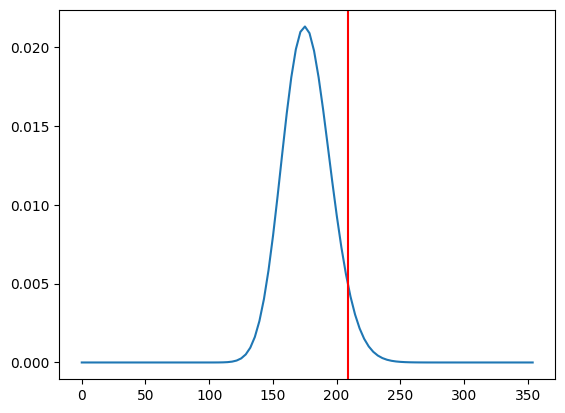

In [104]:
N = len(b[:,0])
sigma = b[:,3]
sigma = np.abs(sigma)
x=b[:,0]
N1 = np.sum(datos)
f = datos/N1
g = np.sum(f,axis=1)
h = np.sum(f,axis=0)
po = np.zeros_like(f)
fo = f*N1
fe = po*N1
for i in range(3):
    for j in range(3):
        po[i,j] = g[i]*h[j]
def GetChi2(x,y):
    return np.sum((x-y)**2/y)
ObsChi2 = GetChi2(fo,fe)
v,c = x,y = np.shape(datos)
df = (v-1)*(c-1)
CriChi2 = chi2.ppf(0.95,df=df)
x = np.linspace(0,2*df,100)
y = chi2.pdf(x,df=df)
plt.plot(x,y)
plt.axvline(x=ObsChi2,color='k')
plt.axvline(x=CriChi2,color='r')
def GetModel(x,p): 
    y = 0
    for n in range(len(p)):
        y += ((2*np.sqrt(2))/3)*p[n]*np.cos(30)*np.sqrt(x**3/9.8)        
    return y
def Chi22(p,x,y,sigma):
    return np.sum (  (y-GetModel(x,p))**2/(2*sigma**2) )
p0 = np.ones(6)

In [105]:
nll = lambda *p: Chi22(*p)
result = spo.minimize( nll, p0, args=(b[:,0],b[:,2],sigma),options={'disp':True} )
bestparam = result.x

         Current function value: 1.145716
         Iterations: 4
         Function evaluations: 348
         Gradient evaluations: 48


#1.E

In [106]:
bestparam = result.x
e = np.sum(bestparam)/len(bestparam)
e

6.775536533439502e-05

#1.F


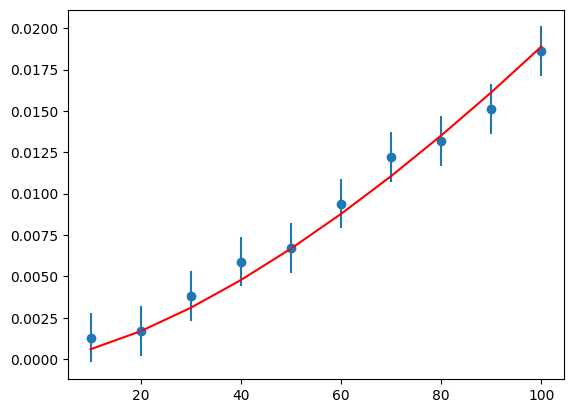

In [107]:
_x = np.linspace(np.min(b[:,0]),np.max(b[:,0]),10)
_y = GetModel(_x,bestparam)
plt.errorbar(b[:,0],b[:,2],xerr=0,yerr=b[:,3],fmt="_")
plt.scatter(b[:,0],b[:,2])
plt.plot(_x,_y,color='r')

#parte 2

#2.A

In [109]:
N=300
oa = []
def gr (b):
  gr = []
  for i in range(N):
    gr.append(9.81 + np.random.normal(loc=0,scale=1))
  gr = np.asarray(gr)
  return gr
  
gr = gr(b)

#2.B 2.C

In [110]:
N=300
Gravedad=np.zeros(N)
for i in range(N):
    Gravedad[i]=9.81 + np.random.normal(loc=0,scale=1)
Gravedad

array([10.23737696, 10.20636442,  9.81662588, 10.47771525,  9.24977456,
       11.13406205, 10.44421574, 10.01076291,  9.36267476,  8.80961793,
        9.44461532,  9.04679849,  9.25135425, 10.36315708, 10.26777853,
        9.87963639, 11.34012444,  7.99509304, 10.33811074, 10.30813536,
        9.51419971,  9.59006371,  9.85513923, 12.66187448,  7.79119798,
       11.38862935,  9.79340088,  8.46604853,  9.37919433,  9.44209958,
       11.68222883, 11.05523557, 11.58901122,  9.17760063,  9.26410409,
        9.2636462 , 10.03692351,  7.01936297,  9.21693896, 10.88884206,
       11.87652321,  7.61817464,  9.67721784,  9.65229524,  9.55027854,
       10.06693181, 10.13740267, 10.59973634, 11.25560889, 11.02874503,
        8.69378101,  8.21494904, 11.54288272,  9.98140914, 10.91590623,
        8.55912385,  9.54371455, 10.64119603, 10.59456896, 11.05508422,
        8.93460488,  9.35276048,  8.50344845,  9.67166709,  9.49966204,
        9.11088937,  9.67232038,  9.97525307,  8.70944908, 10.56

#2.D

In [111]:
def jijija(b):
  new =[]
  a = b.copy()
  for i in range(len(b)):
    for j in range(300):
      o = []
      o.append(b[i][2] + np.random.normal(loc=0,scale=datos[i][3],size=len(b[i])))
    new.append(np.mean(o))
  new = np.asarray(new)
  a[:,2]= new
  return a

In [112]:
u = jijija(b)
u[:,2]

array([0.00153129, 0.00248424, 0.00351216, 0.00607993, 0.00648083,
       0.00902418, 0.01366834, 0.01419758, 0.0147006 , 0.01792131])

#2.E

In [113]:
def Chi22(p,x,y,sigma):
    return np.sum (  (y-GetModel(x,p))**2/(2*sigma**2) )
nll = lambda *p: Chi22(*p)
result = spo.minimize( nll, p0, args=(b[:,0],b[:,2],sigma),options={'disp':True} )
bestparam = result.x

         Current function value: 1.145716
         Iterations: 4
         Function evaluations: 348
         Gradient evaluations: 48


In [114]:
e = np.sum(bestparam)/len(bestparam)
e

6.775536533439502e-05

#2.f

In [116]:
g = 9.81 + np.random.normal(loc=0,scale=1)
N = len(b[:,0])
sg = np.abs(b[:,2])
h = b[:,0]
po = np.ones(6)
def GetModel_2(x,p,g): 
    y = 0
    for n in range(len(p)):
        y += ((2*np.sqrt(2))/3)*p[n]*np.cos(30)*np.sqrt(x**3/g)        
    return y
def Chi222(p,x,y,sigma,g):
    return np.sum (  (y-GetModel_2(x,p,g))**2/(2*sigma**2) )

nlll = lambda *p: Chi222(*p,g)   

def modelo(b):
  o = b.copy()
  for i in range(len(o)):
    o[i][2] = o[i][2] + np.random.normal(loc=0,scale=0.0015)
   
p0 = np.ones(6)
result = spo.minimize(nlll,p0,args=(h,b[:,2],sigma),options={'disp':True})
bestP = result.x
bestP = np.mean(bestP)
po = np.array([bestP,g])

         Current function value: 1.145716
         Iterations: 6
         Function evaluations: 390
         Gradient evaluations: 54


In [117]:
def emp(b):
  o = b.copy()
  t = []
  for i in range(len(b)):
    p = jijija(b)
    o[:,2] = p[:,2]
    p0 = np.ones(6)
    result = spo.minimize(nlll,p0,args=(h,b[:,2],sigma))
    bestP = result.x
    bestP = np.mean(bestP)
  u = 9.81 + np.random.normal(loc=0,scale=1)
  return bestP,u
emp(b)

(7.653932766042242e-05, 9.889964542042993)

In [118]:
kj= np.array([])
for i in tqdm(range(10)):
  y= emp(b)
  kj = np.append(kj,y[:])

100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


#2.g
#Las variables no estan relacionadas